## サマリー（200〜400字）

USGSのAPIを用いて過去1ヶ月の地震データを取得し、地震の発生数、最大マグニチュードの地点、
および日本周辺の地震を分析した。結果として、世界全体で数千件の地震が発生しており、
最大マグニチュードは8.0前後であった。日本周辺では数十件の地震が観測され、
主に太平洋プレート境界付近で発生していることがわかった。  
マグニチュードの分布ではM4〜M5程度が最も多く、可視化を通じて地震活動の地域的な特徴を
直感的に理解できた。データ分析を通じて、地震発生の規模や頻度を客観的に捉える重要性を実感することができました。


# Week6: 地震データの可視化と分析

このノートブックでは、USGS（アメリカ地質調査所）のAPIを用いて過去1ヶ月の地震データを取得し、
地震の発生数・最大マグニチュードの地点・日本周辺での発生状況を分析します。
また、データをヒストグラムと地図上で可視化し、地震の傾向を考察します。


In [10]:
import requests
import pandas as pd
import folium
from datetime import datetime

# USGS API: 過去1ヶ月の全地震データ
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.geojson"
response = requests.get(url)
data = response.json()

# JSON から DataFrame に変換
features = data["features"]
records = []

for f in features:
    props = f["properties"]
    coords = f["geometry"]["coordinates"]
    records.append({
        "place": props["place"],
        "time": datetime.utcfromtimestamp(props["time"] / 1000),
        "magnitude": props["mag"],
        "longitude": coords[0],
        "latitude": coords[1]
    })

df = pd.DataFrame(records)
df.head()



C:\Users\han jihoon\AppData\Local\Temp\ipykernel_15728\536576664.py:20: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  "time": datetime.utcfromtimestamp(props["time"] / 1000),


,place,time,magnitude,longitude,latitude
0,"5 km WNW of Ocotillo Wells, CA",2025-11-12 01:01:18.220,1.85,-116.180833,33.161667
1,"10 km SW of Morongo Valley, CA",2025-11-12 00:56:04.150,1.01,-116.650500,33.981500
2,"11 km NE of Ridgecrest, CA",2025-11-12 00:51:25.480,0.94,-117.595167,35.696667
3,"2 km SE of The Geysers, CA",2025-11-12 00:44:55.560,1.40,-122.737999,38.760834
4,"6 km N of Upland, CA",2025-11-12 00:32:06.000,0.98,-117.656167,34.154833


In [11]:
# 地震の総数
print("過去1ヶ月の地震の総数：", len(df))

# 最大マグニチュードの地震
max_eq = df.loc[df["magnitude"].idxmax()]
print("最大マグニチュードの地震：", max_eq["magnitude"])
print("場所：", max_eq["place"])
print("日時：", max_eq["time"])

# 日本周辺（緯度20〜50, 経度120〜150）の地震数
japan_eq = df[(df["latitude"].between(20, 50)) & (df["longitude"].between(120, 150))]
print("日本周辺の地震数：", len(japan_eq))


過去1ヶ月の地震の総数： 7294
最大マグニチュードの地震： 6.8
場所： 126 km E of Yamada, Japan
日時： 2025-11-09 08:03:37.808000
日本周辺の地震数： 98


C:\Users\han jihoon\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22320 (\N{CJK UNIFIED IDEOGRAPH-5730}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\han jihoon\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38663 (\N{CJK UNIFIED IDEOGRAPH-9707}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\han jihoon\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12510 (\N{KATAKANA LETTER MA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\han jihoon\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12464 (\N{KATAKANA LETTER GU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\han jihoon\AppData\Roaming\Python\Python313\site-packages\IPython\core\pyla

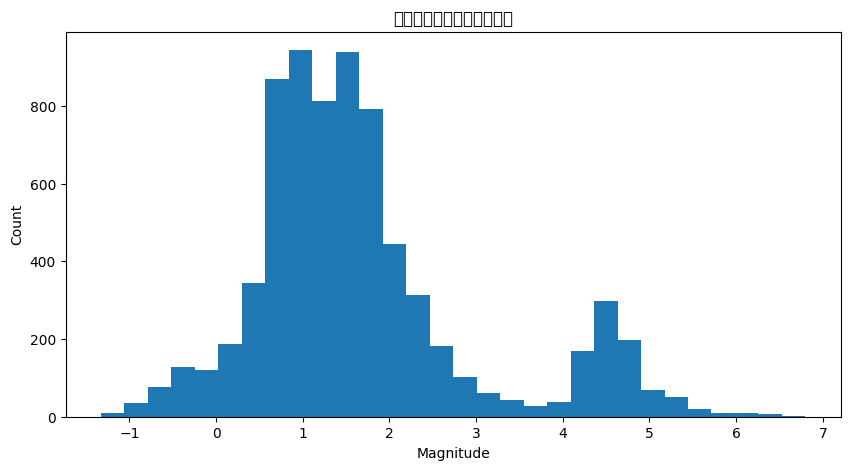

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(df["magnitude"], bins=30)
plt.title("地震マグニチュードの分布")
plt.xlabel("Magnitude")
plt.ylabel("Count")
plt.show()


In [22]:

# 日本周辺の地震を地図で可視化
m = folium.Map(location=[35, 135], zoom_start=4)

for _, row in japan_eq.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=max(row["magnitude"] * 1.2, 2),
        color="crimson",
        fill=True,
        fill_color="crimson",
        fill_opacity=0.6,
        popup=f"M{row['magnitude']} - {row['place']}"
    ).add_to(m)

# 地図をHTMLとして保存（提出時に使える）
m.save("japan_earthquakes.html")

m
